In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
sales_data=pd.read_csv("C:\ML\DATA\SALES.CSV")

In [42]:
sales_data.head()

,Customer ID,Product code,Weight,Fat level,% of space allocation,Product,Price of product,Store ID,Store Establishment Year,Store size,Store Tier Type,Store Type,Sale of product
0,EAT4532,FDA15,9.30,Low Fat,1.604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,EAT4533,DRC01,5.92,Regular,1.927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,EAT4534,FDN15,17.50,Low Fat,1.676008,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,EAT4535,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732
4,EAT4536,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,995


In [43]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value
        in column.
        Columns of other types are imputed with mean of column.
        """
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
sales_df = pd.DataFrame(sales_data)
sales_clean_df = DataFrameImputer().fit_transform(sales_df)

In [44]:
sales_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Customer ID                 8523 non-null object
Product code                8523 non-null object
Weight                      8523 non-null float64
Fat level                   8523 non-null object
% of space allocation       8523 non-null float64
Product                     8523 non-null object
Price of product            8523 non-null float64
Store ID                    8523 non-null object
Store Establishment Year    8523 non-null int64
Store size                  8523 non-null object
Store Tier Type             8523 non-null object
Store Type                  8523 non-null object
Sale of product             8523 non-null int64
dtypes: float64(3), int64(2), object(8)
memory usage: 865.7+ KB


In [45]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    return df

In [46]:
numerical_features = ['Weight','% of space allocation','Price of product','Sale of product']

In [47]:
categorical_features = ['Fat level', 'Product','Store ID','Store size','Store Tier Type','Store Establishment Year','Store Type']

In [48]:
sales_all_features = numerical_features + categorical_features

In [49]:
sales_final=sales_clean_df[sales_all_features]

In [50]:
sales_final_df=pd.DataFrame(sales_final)

In [51]:
cleanup_nums = {"Fat level":     {"Low Fat": 0, "Regular": 1,"low fat":0,"LF":0,"reg":1,"0":2}}

In [52]:
sales_final_df.replace(cleanup_nums,inplace=True)

In [53]:
for c_feature in categorical_features:
  sales_final_df = create_dummies( sales_final_df, c_feature )

In [462]:
sales_final_df['Price of product'] = np.log1p( sales_final_df["Price of product"] )


In [433]:
#df['% of space allocation'] = np.log1p( sales_final_df["% of space allocation"] )

In [434]:
#sales_final_df['Weight'] = np.log1p( sales_final_df.Weight )

In [435]:
#()

In [17]:
sales_final_df.head()

,Weight,% of space allocation,Price of product,Sale of product,Fat level,Product,Store ID,Store size,Store Tier Type,Store Establishment Year,...,Store Establishment Year_1997,Store Establishment Year_1998,Store Establishment Year_1999,Store Establishment Year_2002,Store Establishment Year_2004,Store Establishment Year_2007,Store Establishment Year_2009,Store Type_Supermarket Type1,Store Type_Supermarket Type2,Store Type_Supermarket Type3
0,9.30,1.604730,249.8092,3735,0,Dairy,OUT049,Medium,Tier 1,1999,...,0,0,1,0,0,0,0,1,0,0
1,5.92,1.927822,48.2692,443,1,Soft Drinks,OUT018,Medium,Tier 3,2009,...,0,0,0,0,0,0,1,0,1,0
2,17.50,1.676008,141.6180,2097,0,Meat,OUT049,Medium,Tier 1,1999,...,0,0,1,0,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732,1,Fruits and Vegetables,OUT010,Medium,Tier 3,1998,...,0,1,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,995,0,Household,OUT013,High,Tier 3,1987,...,0,0,0,0,0,0,0,1,0,0


In [54]:
sales_final_df=sales_final_df.drop("Product",axis=1)

In [55]:
sales_final_df=sales_final_df.drop("Store size",axis=1)

In [56]:
sales_final_df=sales_final_df.drop("Store ID",axis=1)

In [57]:
sales_final_df=sales_final_df.drop("Fat level",axis=1)

In [58]:
sales_final_df=sales_final_df.drop("Store Type",axis=1)

In [59]:
sales_final_df=sales_final_df.drop("Store Establishment Year",axis=1)

In [60]:
sales_final_df=sales_final_df.drop("Store Tier Type",axis=1)

In [25]:
sales_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 45 columns):
Weight                           8523 non-null float64
% of space allocation            8523 non-null float64
Price of product                 8523 non-null float64
Sale of product                  8523 non-null int64
Fat level_1                      8523 non-null uint8
Fat level_2                      8523 non-null uint8
Product_Breads                   8523 non-null uint8
Product_Breakfast                8523 non-null uint8
Product_Canned                   8523 non-null uint8
Product_Dairy                    8523 non-null uint8
Product_Frozen Foods             8523 non-null uint8
Product_Fruits and Vegetables    8523 non-null uint8
Product_Hard Drinks              8523 non-null uint8
Product_Health and Hygiene       8523 non-null uint8
Product_Household                8523 non-null uint8
Product_Meat                     8523 non-null uint8
Product_Others                   8523 n

In [445]:

sales_final_df['Sale of product'] = np.log1p( sales_final_df["Sale of product"] )

In [61]:
sales_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 45 columns):
Weight                           8523 non-null float64
% of space allocation            8523 non-null float64
Price of product                 8523 non-null float64
Sale of product                  8523 non-null int64
Fat level_1                      8523 non-null uint8
Fat level_2                      8523 non-null uint8
Product_Breads                   8523 non-null uint8
Product_Breakfast                8523 non-null uint8
Product_Canned                   8523 non-null uint8
Product_Dairy                    8523 non-null uint8
Product_Frozen Foods             8523 non-null uint8
Product_Fruits and Vegetables    8523 non-null uint8
Product_Hard Drinks              8523 non-null uint8
Product_Health and Hygiene       8523 non-null uint8
Product_Household                8523 non-null uint8
Product_Meat                     8523 non-null uint8
Product_Others                   8523 n

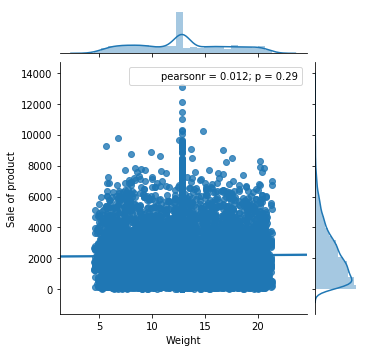

In [317]:
sns.jointplot(x="Weight", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)

In [318]:
#Not significant

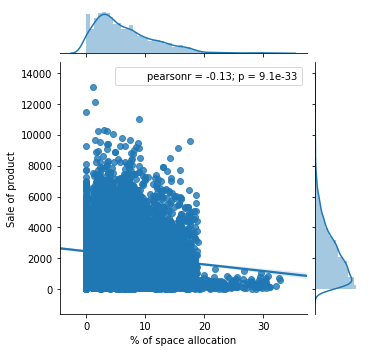

In [319]:
sns.jointplot(x="% of space allocation", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)

In [320]:
#Significant

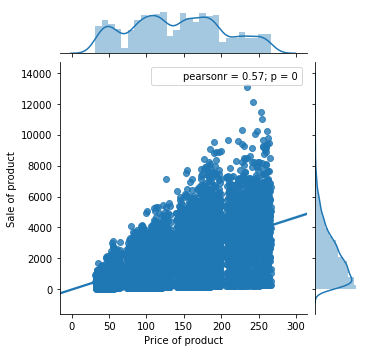

In [321]:
sns.jointplot(x="Price of product", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)

In [322]:
#Significant

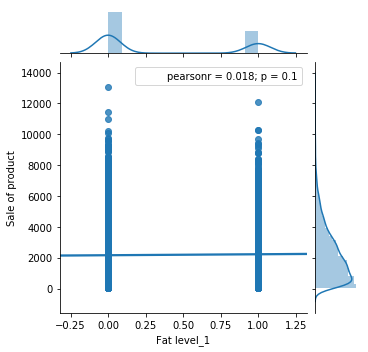

In [323]:
sns.jointplot(x="Fat level_1", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)

In [324]:
#Not Significant

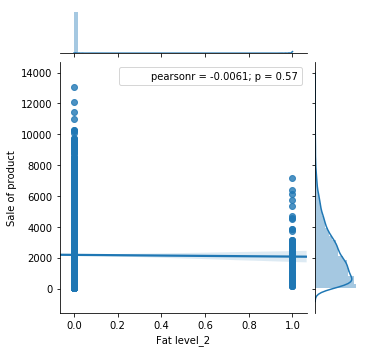

In [325]:
sns.jointplot(x="Fat level_2", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)

In [326]:
#Not Significant

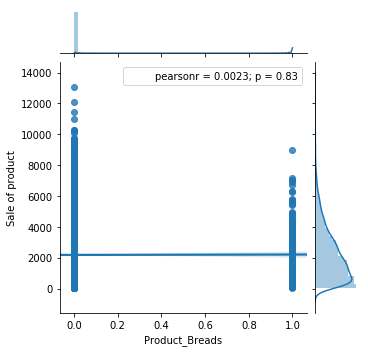

In [327]:
sns.jointplot(x="Product_Breads", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

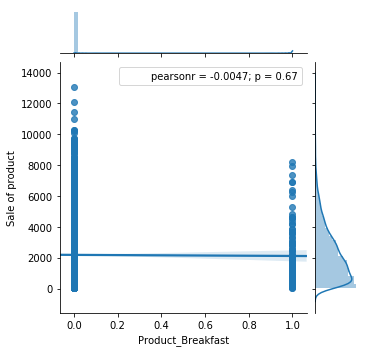

In [328]:
sns.jointplot(x="Product_Breakfast", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

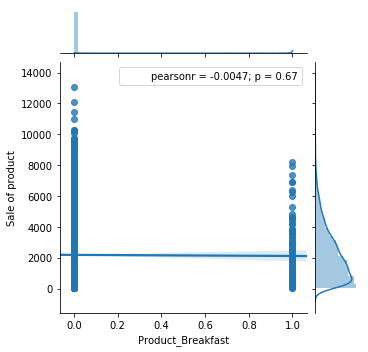

In [329]:
sns.jointplot(x="Product_Breakfast", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

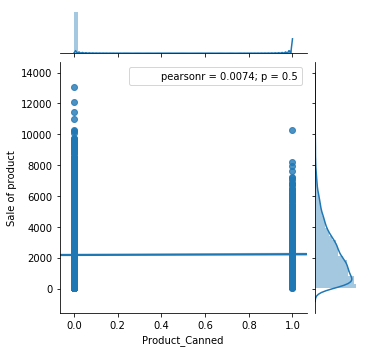

In [330]:
sns.jointplot(x="Product_Canned", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

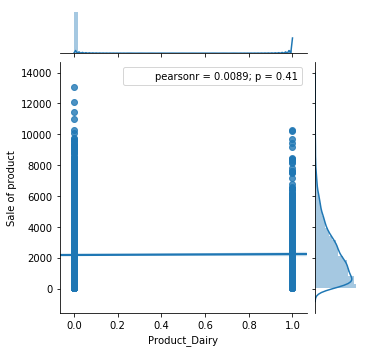

In [331]:
sns.jointplot(x="Product_Dairy", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

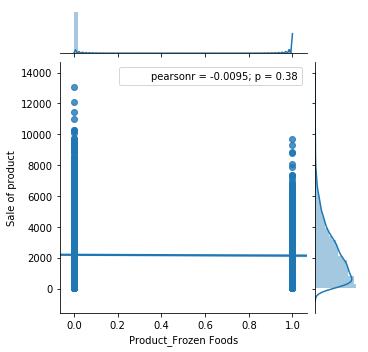

In [332]:
sns.jointplot(x="Product_Frozen Foods", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

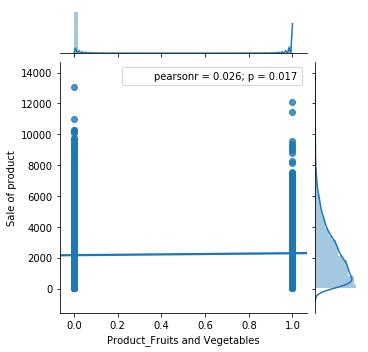

In [333]:
sns.jointplot(x="Product_Fruits and Vegetables", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

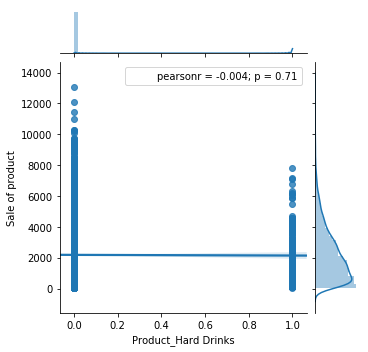

In [334]:
sns.jointplot(x="Product_Hard Drinks", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

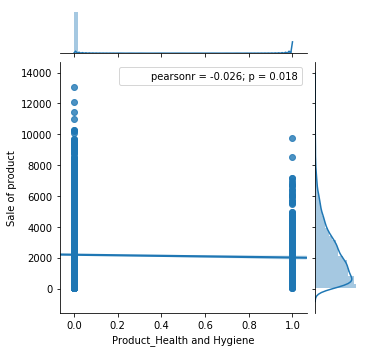

In [335]:
sns.jointplot(x="Product_Health and Hygiene", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

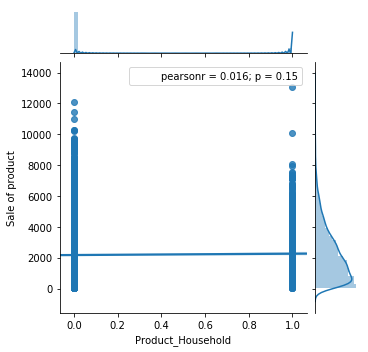

In [336]:
sns.jointplot(x="Product_Household", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

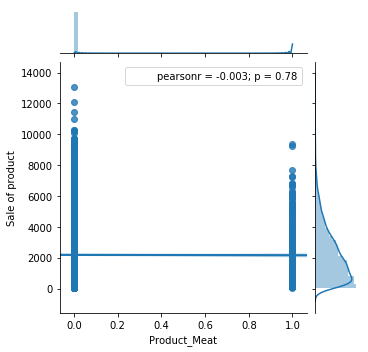

In [337]:
sns.jointplot(x="Product_Meat", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

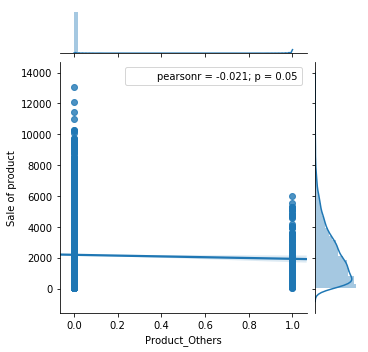

In [338]:
sns.jointplot(x="Product_Others", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) # Significant

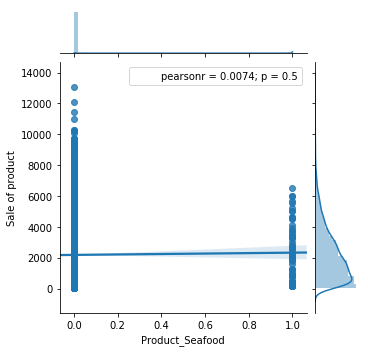

In [339]:
sns.jointplot(x="Product_Seafood", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

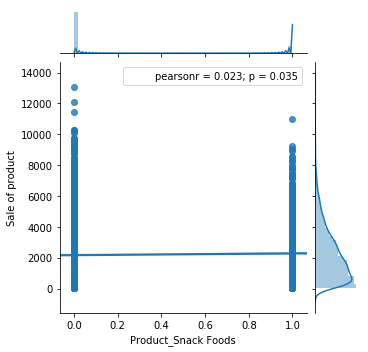

In [340]:
sns.jointplot(x="Product_Snack Foods", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) # Significant

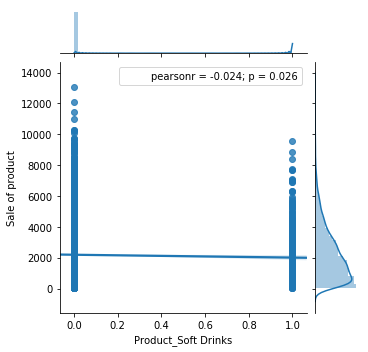

In [341]:
sns.jointplot(x="Product_Soft Drinks", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #not Significant

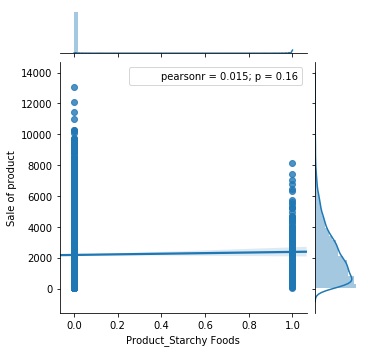

In [342]:
sns.jointplot(x="Product_Starchy Foods", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

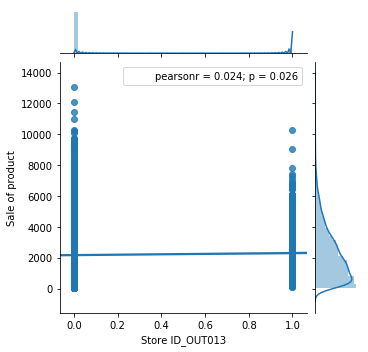

In [343]:
sns.jointplot(x="Store ID_OUT013", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

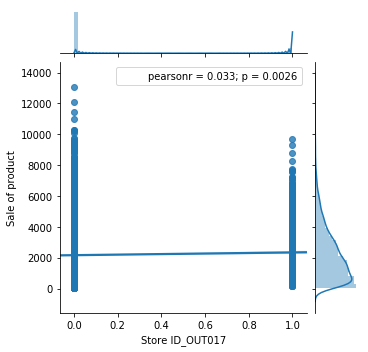

In [344]:
sns.jointplot(x="Store ID_OUT017", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

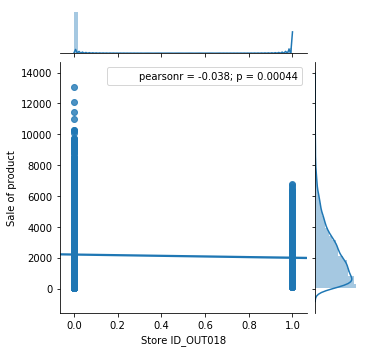

In [345]:
sns.jointplot(x="Store ID_OUT018", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

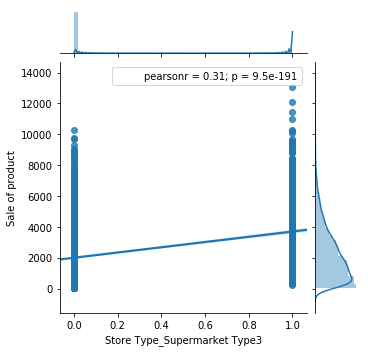

In [346]:
sns.jointplot(x="Store Type_Supermarket Type3", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

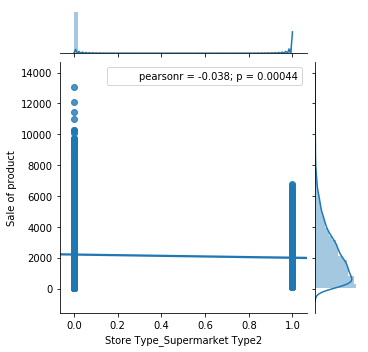

In [347]:
sns.jointplot(x="Store Type_Supermarket Type2", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

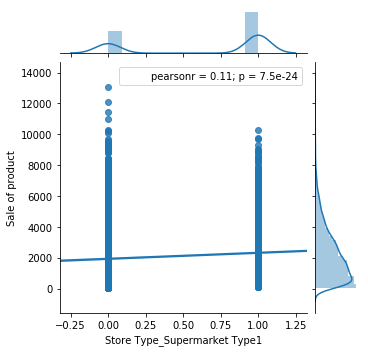

In [348]:
 sns.jointplot(x="Store Type_Supermarket Type1", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)# Significant

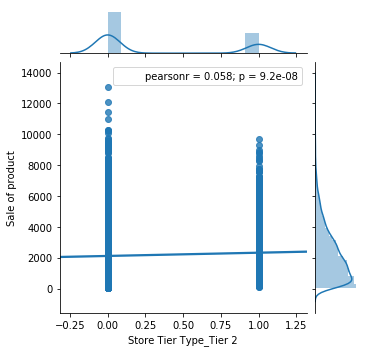

In [349]:
sns.jointplot(x="Store Tier Type_Tier 2", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

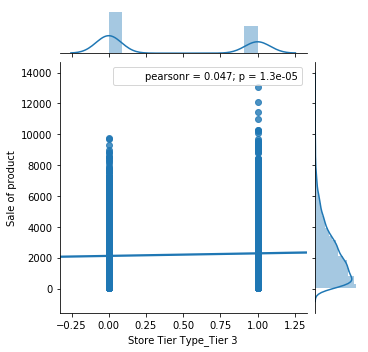

In [350]:
sns.jointplot(x="Store Tier Type_Tier 3", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

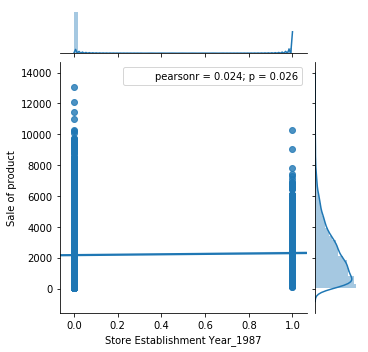

In [351]:
sns.jointplot(x="Store Establishment Year_1987", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

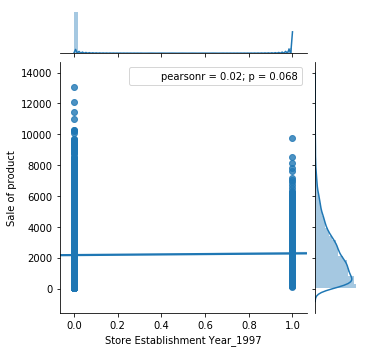

In [352]:
 sns.jointplot(x="Store Establishment Year_1997", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

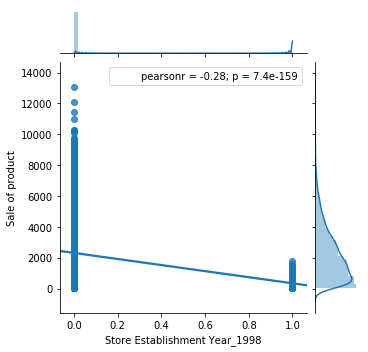

In [353]:
sns.jointplot(x="Store Establishment Year_1998", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

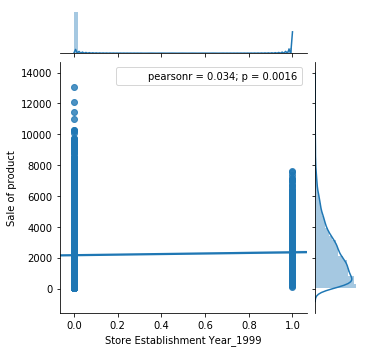

In [354]:
 sns.jointplot(x="Store Establishment Year_1999", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

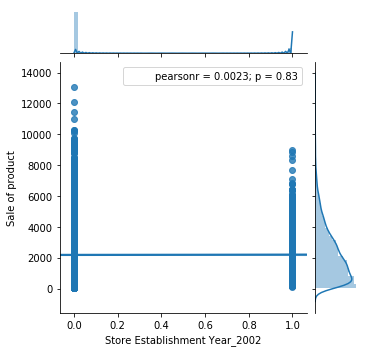

In [355]:
sns.jointplot(x="Store Establishment Year_2002", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

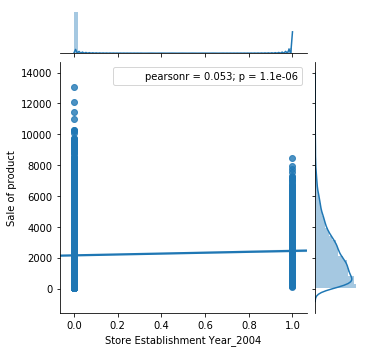

In [356]:
 sns.jointplot(x="Store Establishment Year_2004", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

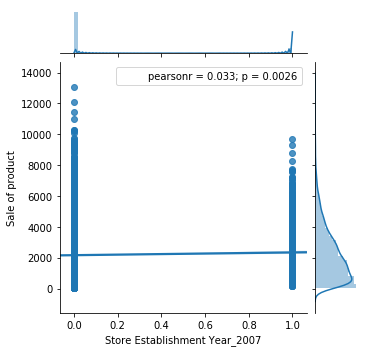

In [357]:
 sns.jointplot(x="Store Establishment Year_2007", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)# Significant

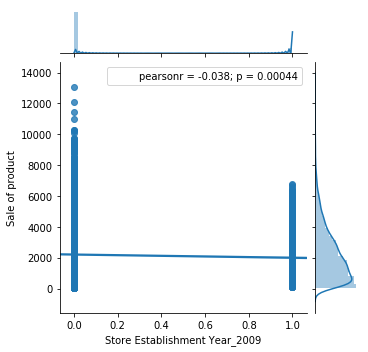

In [358]:
 sns.jointplot(x="Store Establishment Year_2009", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

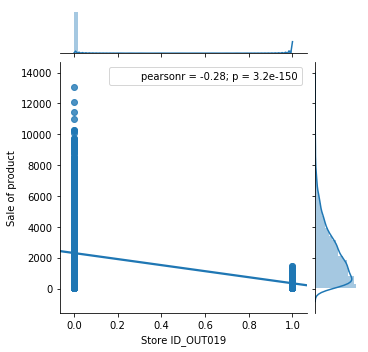

In [359]:
 sns.jointplot(x="Store ID_OUT019", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

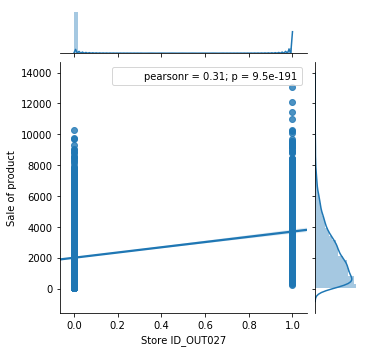

In [360]:
 sns.jointplot(x="Store ID_OUT027", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

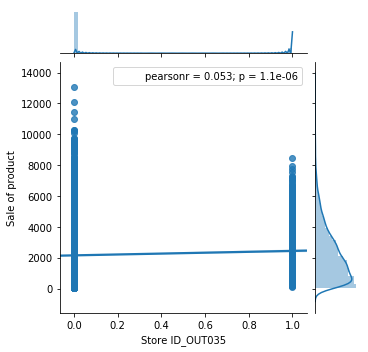

In [361]:
 sns.jointplot(x="Store ID_OUT035", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #significant

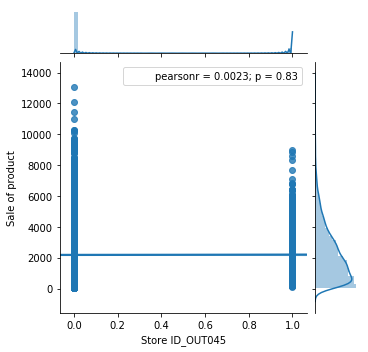

In [362]:
 sns.jointplot(x="Store ID_OUT045", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

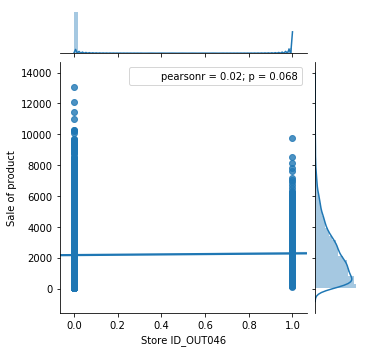

In [363]:
 sns.jointplot(x="Store ID_OUT046", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

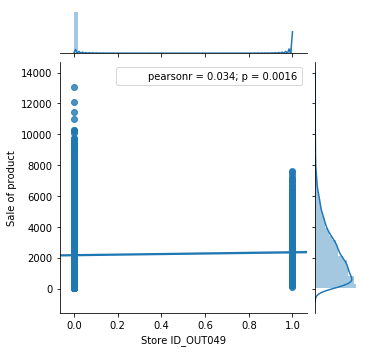

In [364]:
 sns.jointplot(x="Store ID_OUT049", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

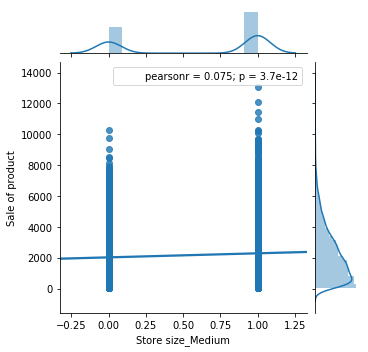

In [365]:
sns.jointplot(x="Store size_Medium", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

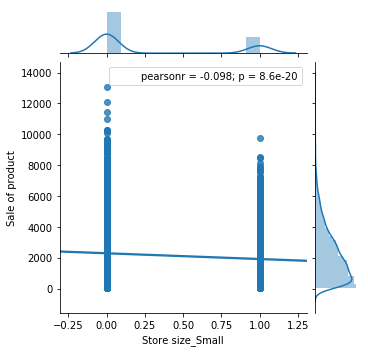

In [366]:
sns.jointplot(x="Store size_Small", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)#Significant

In [26]:
slstest=sales_final_df

In [27]:

from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
  slstest[["% of space allocation",
"Price of product",
"Product_Fruits and Vegetables",

"Product_Snack Foods",

"Store ID_OUT013",
"Store ID_OUT017",
"Store ID_OUT018",
"Store Type_Supermarket Type3",
"Store Type_Supermarket Type1",
"Store Tier Type_Tier 2",
"Store Type_Supermarket Type2",
"Store Establishment Year_1987",
"Store Establishment Year_1997",
"Store Establishment Year_1998",
"Store Establishment Year_1999",
"Store Establishment Year_2002",
"Store Establishment Year_2004",
"Store Establishment Year_2007",
"Store Establishment Year_2009",
"Store ID_OUT019",
"Store ID_OUT027",
"Store ID_OUT035",
"Store ID_OUT045",
"Store ID_OUT046",
"Store ID_OUT049",
"Store size_Medium",
"Store size_Small",
]],
  slstest["Sale of product"],
  test_size=0.2,
  random_state = 42 )

In [63]:
#X_train['space_price'] = X_train["% of space allocation"] * X_train["Price of product"]
#X_test['space_price'] = X_test["% of space allocation"] * X_test["Price of product"]

In [64]:
#X_train['Store Size'] = X_train["Store size_Medium"] * X_train["Store size_Small"]
#X_test['Store Size'] = X_test["Store size_Medium"] * X_test["Store size_Small"]

In [65]:
#X_train

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
linreg = LinearRegression()
linreg.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
y_pred = linreg.predict( X_test )

In [69]:
test_pred_df = pd.DataFrame( { 'actual': y_test,
                            'predicted': np.round( y_pred, 2),
                            'residuals': y_test - y_pred } )


In [70]:
test_pred_df[0:10]

,actual,predicted,residuals
7503,1743,1378.26,364.740781
2957,357,690.91,-333.905820
7031,378,816.78,-438.779664
1084,5778,4217.52,1560.476473
856,2357,3300.05,-943.048260
4304,866,667.10,198.904975
2132,4614,4732.75,-118.750631
1385,2411,2017.70,393.300337
5239,1948,1400.12,547.883180
6516,1937,2795.30,-858.295192


In [71]:
from sklearn import metrics

In [72]:
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )

In [73]:
round( rmse, 2 )

1067.6500000000001

In [74]:
metrics.r2_score( y_test, y_pred )

0.58060946590031781

In [75]:
import matplotlib.pyplot as plt
import seaborn as sn
get_ipython().magic('matplotlib inline')

In [76]:
residuals = y_test - y_pred

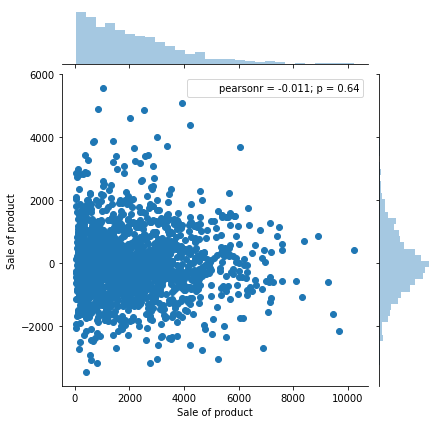

In [77]:
sn.jointplot(  slstest["Sale of product"], residuals, size = 6 )

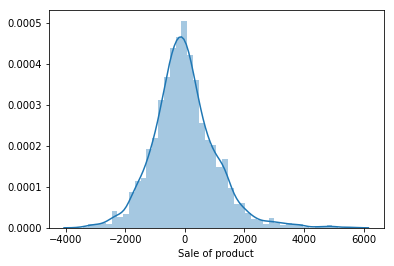

In [78]:
sn.distplot( residuals )

In [2]:
from sklearn.model_selection import cross_val_score

In [3]:

linreg = LinearRegression()


NameError: name 'LinearRegression' is not defined

NameError: name 'y_test' is not defined

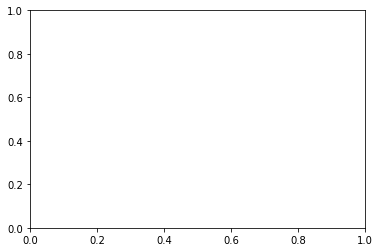

In [5]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [82]:
cv_scores = cross_val_score( linreg, X_train, y_train, scoring = 'r2', cv = 10 )
cv_scores

array([ 0.53857252,  0.58448253,  0.56806845,  0.55547168,  0.57536183,
        0.53274737,  0.54322226,  0.57939371,  0.54217068,  0.54526891])

In [83]:
print( "Average r2 score: ", np.round( np.mean( cv_scores ), 2 ) )
print( "Standard deviation in r2 score: ", np.round( np.std( cv_scores ), 2) )

Average r2 score:  0.56
Standard deviation in r2 score:  0.02


In [84]:

from sklearn.feature_selection import SelectKBest, f_regression

In [85]:
model = SelectKBest( score_func=f_regression, k=4 )

In [86]:
results = model.fit( X_train, y_train)

In [87]:
results.scores_

array([  1.28628506e+02,   3.20107650e+03,   5.67034862e+00,
         3.29262498e+00,   5.94824213e+00,   4.10396078e+00,
         7.59316619e+00,   6.95236977e+02,   7.81393734e+01,
         1.90737895e+01,   7.59316619e+00,   5.94824213e+00,
         2.05505241e+00,   6.03367677e+02,   8.80346234e+00,
         1.83566036e-01,   1.73242612e+01,   4.10396078e+00,
         7.59316619e+00,   5.56690582e+02,   6.95236977e+02,
         1.73242612e+01,   1.83566036e-01,   2.05505241e+00,
         8.80346234e+00,   3.56855874e+01,   6.73300965e+01])

In [88]:
results.pvalues_

array([  1.50301052e-029,   0.00000000e+000,   1.72813241e-002,
         6.96356226e-002,   1.47573158e-002,   4.28217569e-002,
         5.87456105e-003,   5.56508299e-146,   1.20600522e-018,
         1.27621386e-005,   5.87456105e-003,   1.47573158e-002,
         1.51747903e-001,   9.72245876e-128,   3.01703678e-003,
         6.68339927e-001,   3.19016759e-005,   4.28217569e-002,
         5.87456105e-003,   2.21191834e-118,   5.56508299e-146,
         3.19016759e-005,   6.68339927e-001,   1.51747903e-001,
         3.01703678e-003,   2.43548851e-009,   2.72223106e-016])

In [89]:
['%.3f' % p for p in results.pvalues_]

['0.000',
 '0.000',
 '0.017',
 '0.070',
 '0.015',
 '0.043',
 '0.006',
 '0.000',
 '0.000',
 '0.000',
 '0.006',
 '0.015',
 '0.152',
 '0.000',
 '0.003',
 '0.668',
 '0.000',
 '0.043',
 '0.006',
 '0.000',
 '0.000',
 '0.000',
 '0.668',
 '0.152',
 '0.003',
 '0.000',
 '0.000']